In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch

from models import MLP
from datas import get_dataset_2d_gaussian

# Data Set

In [2]:

trainset, trainloader, testset, testloader, classes = get_dataset_2d_gaussian(32)
print(len(trainloader))

141


# Model

In [3]:
in_dim, out_dim, hidden_dim, num_hidden_layers = 2, 4, 8, 4
model = MLP(in_dim, out_dim, hidden_dim, num_hidden_layers)

# Train

In [4]:
def get_model_dtype(model):
    return next(model.parameters()).dtype

In [5]:
model = model.to('cuda')
dtype = get_model_dtype(model)
losser = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
print(dtype)
num_epoch = 20

torch.float32


In [7]:
epoch_eval_losses = []
epoch_train_avg_loss = []
epoch_eval_accs = []
batch_losses = []
for epoch in range(num_epoch):
    epoch_train_losses = []
    for batch in trainloader:
        samples, labels = batch
        samples = samples.to('cuda', dtype=dtype)
        labels = labels.to('cuda', dtype=torch.long)
        pred = model(samples)
        loss = losser(pred, labels)
        optim.zero_grad()
        loss.backward()
        optim.step()
        epoch_train_losses.append(loss.item())

    num_samples, correct, eval_loss = 0, 0, 0
    for batch in testloader:
        with torch.no_grad():
            samples, labels = batch
            samples = samples.to('cuda', dtype=dtype)
            labels = labels.to('cuda', dtype=torch.long)
            model_output = model(samples)
            pred = torch.argmax(model_output, dim=-1)
            num_correct = torch.sum(pred == labels)
            num_samples += pred.shape[0]
            correct += num_correct
            eval_loss += torch.nn.functional.cross_entropy(model_output, labels, reduction='none').sum()
    
    epoch_train_losses = np.array(epoch_train_losses).mean()
    epch_eval_loss = eval_loss/num_samples
    epoch_eval_acc = correct / num_samples
    epoch_train_avg_loss.append(epoch_train_losses.item())
    epoch_eval_losses.append(epch_eval_loss.item())
    batch_losses.extend(epoch_train_avg_loss)
    epoch_eval_accs.append(epoch_eval_acc)
    print(f'epoch {epoch}, train avg loss {epoch_train_losses}, eval loss {epch_eval_loss: .02f}, eval acc {epoch_eval_acc: .02f}')

epoch 0, train avg loss 1.204999103613779, eval error  0.92, eval acc  0.46
epoch 1, train avg loss 0.782458744784619, eval error  0.65, eval acc  0.69
epoch 2, train avg loss 0.5891462188240484, eval error  0.57, eval acc  0.69
epoch 3, train avg loss 0.5571223414958791, eval error  0.54, eval acc  0.75
epoch 4, train avg loss 0.5173533426743027, eval error  0.49, eval acc  0.80
epoch 5, train avg loss 0.4735938945771955, eval error  0.45, eval acc  0.82
epoch 6, train avg loss 0.45326984721295377, eval error  0.45, eval acc  0.82
epoch 7, train avg loss 0.4455602648833119, eval error  0.44, eval acc  0.82
epoch 8, train avg loss 0.4399438315460868, eval error  0.44, eval acc  0.82
epoch 9, train avg loss 0.44046218598142584, eval error  0.44, eval acc  0.80
epoch 10, train avg loss 0.4349415003196567, eval error  0.44, eval acc  0.82
epoch 11, train avg loss 0.43656564392942065, eval error  0.43, eval acc  0.83
epoch 12, train avg loss 0.4343898483413331, eval error  0.43, eval acc  

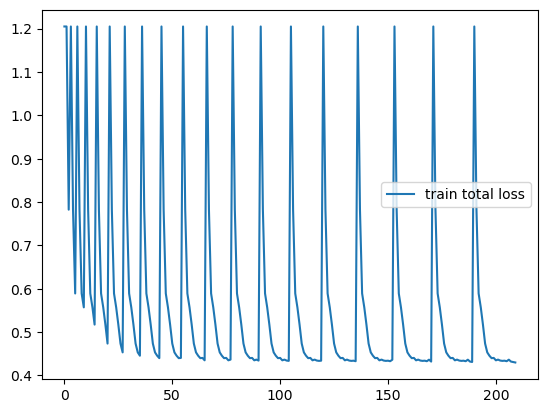

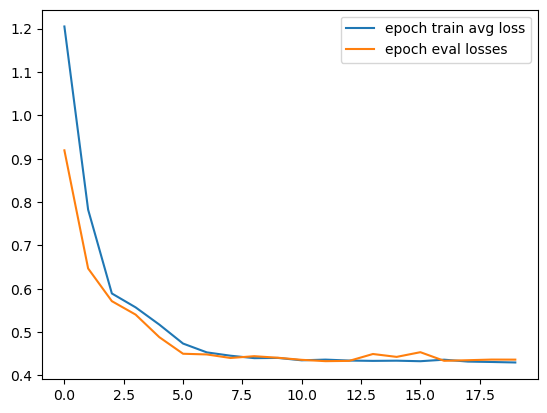

In [9]:
plt.plot(batch_losses, label='train total loss')
plt.legend()
plt.show()

plt.plot(epoch_train_avg_loss, label='epoch train avg loss')
plt.plot(epoch_eval_losses, label='epoch eval losses')
plt.legend()
